In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# load data
data_wine_white = pd.read_csv("data/winequality-white.csv", sep=";")
data_wine_red = pd.read_csv("data/winequality-red.csv", sep=";")

# add type column
# white = 0, red = 1
data_wine_white["type"] = 0
data_wine_red["type"] = 1

# concat data frames
data = pd.concat([data_wine_white, data_wine_red])

# reset indices
data = data.reset_index()
del data["index"]

# separate x and y
feature_list = list(data)
feature_list.remove("type")
x = data[feature_list]
y = data[["type"]]

# split train and test data, allotting 40% of the data to test data.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=0)

'''
    Now, we will try to fit a kNN model to predict its type. kNN is a classification algorithm wherein
the distance of the samples from each other are computed and it will determine where the specific 
sample is classified, i.e., if a sample is nearer to a white wine sample, then it is a white wine, else,
it is a red wine sample.
    In kNN algorithm, there is a constant called `k`. `k` is the number of neighbors needed to vote
that a sample is going into that category. In `k` = 3, it means that a sample must be near 3 white
wine samples to be considered to be a white wine sample.
    In R, we can have array of `k` values and a function will determine the best value of `k`.
But here in Python, we have to have a trial and error process to determine the best `k` value.
    For this problem, we will test our accuracy in a `k` range of 1 to 25.
'''
k_range = range(1, 26)
train_x_df = pd.DataFrame(train_x, columns=feature_list)
accuracies = {}

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_x_df, train_y)
    y_hat = knn_model.predict(train_x_df)
    accuracies[k] = metrics.accuracy_score(train_y, y_hat)

accuracy_list = list(accuracies.values())

<ipython-input-1-c6d67320eb97>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-1-c6d67320eb97>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-1-c6d67320eb97>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-1-c6d67320eb97>:51: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-1-c6d67320eb97>:51: DataConversionWarning: A column-vector y was passed w

In [2]:
accuracies

{1: 1.0,
 2: 0.9704976911236531,
 3: 0.965623396613648,
 4: 0.9551051821446895,
 5: 0.9551051821446895,
 6: 0.948178553104156,
 7: 0.9471523858388917,
 8: 0.9445869676757311,
 9: 0.9484350949204721,
 10: 0.9466393022062596,
 11: 0.9451000513083633,
 12: 0.9425346331452027,
 13: 0.9422780913288866,
 14: 0.9427911749615188,
 15: 0.9404822986146741,
 16: 0.9402257567983582,
 17: 0.939712673165726,
 18: 0.9409953822473063,
 19: 0.9402257567983582,
 20: 0.9404822986146741,
 21: 0.939712673165726,
 22: 0.9381734222678296,
 23: 0.9389430477167778,
 24: 0.9379168804515136,
 25: 0.9381734222678296}

In [3]:
k_range = range(3, 26)
train_x_df = pd.DataFrame(train_x, columns=feature_list)
accuracies = {}

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_x_df, train_y)
    y_hat = knn_model.predict(train_x_df)
    accuracies[k] = metrics.accuracy_score(train_y, y_hat)

accuracy_list = list(accuracies.values())

<ipython-input-3-ec25cbb73668>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-3-ec25cbb73668>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-3-ec25cbb73668>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-3-ec25cbb73668>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-3-ec25cbb73668>:7: DataConversionWarning: A column-vector y was passed when a

ValueError: x and y must have same first dimension, but have shapes (1,) and (23,)

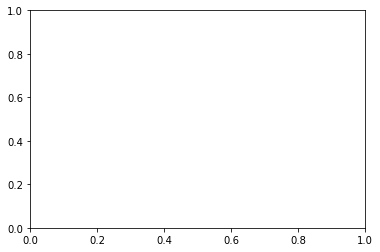

In [4]:
plt.plot(k, accuracy_list)

In [5]:
np_accuracy = np.fromiter(accuracies.items(), dtype=dtype, count=len(accuracies))

NameError: name 'dtype' is not defined

In [6]:
np_accuracy = np.fromiter(accuracies.items(), dtype=np.float32, count=len(accuracies))

ValueError: setting an array element with a sequence.

In [7]:
pd.DataFrame(accuracies)

ValueError: If using all scalar values, you must pass an index

<BarContainer object of 23 artists>

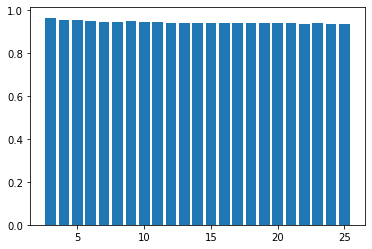

In [8]:
plt.bar(k_range, accuracies.values(), align="center")

ValueError: x and y must have same first dimension, but have shapes (23,) and (1,)

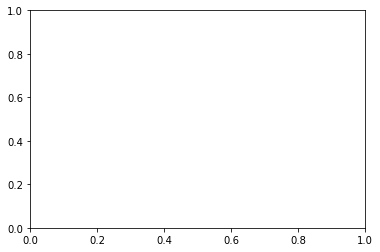

In [9]:
plt.plot(k_range, accuracies.values())

In [10]:
accuracies.values()

dict_values([0.965623396613648, 0.9551051821446895, 0.9551051821446895, 0.948178553104156, 0.9471523858388917, 0.9445869676757311, 0.9484350949204721, 0.9466393022062596, 0.9451000513083633, 0.9425346331452027, 0.9422780913288866, 0.9427911749615188, 0.9404822986146741, 0.9402257567983582, 0.939712673165726, 0.9409953822473063, 0.9402257567983582, 0.9404822986146741, 0.939712673165726, 0.9381734222678296, 0.9389430477167778, 0.9379168804515136, 0.9381734222678296])

In [11]:
k_range

range(3, 26)

ValueError: x and y must have same first dimension, but have shapes (23,) and (1,)

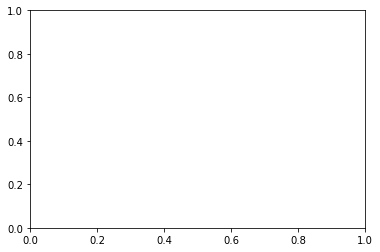

In [12]:
plt.plot(list(k_range), accuracies.values())

In [13]:
list(k_range)

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

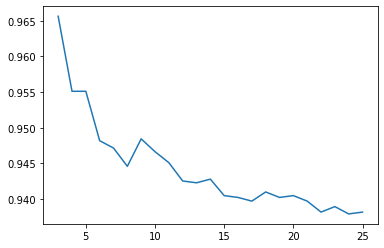

In [14]:
plt.plot(list(k_range), list(accuracies.values()))

<ipython-input-15-524998d0c12d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-15-524998d0c12d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-15-524998d0c12d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-15-524998d0c12d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)
<ipython-input-15-524998d0c12d>:7: DataConversionWarning: A column-vector y was passed w

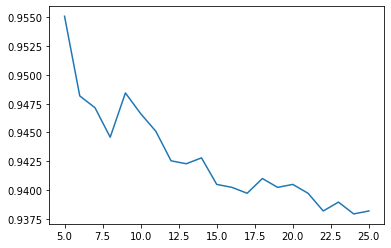

In [15]:
k_range = range(5, 26)
train_x_df = pd.DataFrame(train_x, columns=feature_list)
accuracies = {}

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(train_x_df, train_y)
    y_hat = knn_model.predict(train_x_df)
    accuracies[k] = metrics.accuracy_score(train_y, y_hat)

# now, we plot the values of the accuracies to their `k` value.
plt.plot(list(k_range), list(accuracies.values()))

In [16]:
# for this problem, we will choose 5 as `k`.
# now, to train our final model,
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_x_df, train_y)

# then, we predict from the test set
test_x_df = pd.DataFrame(test_x, columns=feature_list)
y_hat = knn_model.predict(test_x_df)

<ipython-input-16-995f21b5e7bc>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(train_x_df, train_y)


In [17]:
y_hat

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
confusion_matrix = metrics.confusion_matrix(test_y, y_hat)

In [19]:
confusion_matrix

array([[1916,   57],
       [ 105,  521]], dtype=int64)

In [20]:
n_samples = sum(sum(confusion_matrix))
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / n_samples
sensitivity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])
specificity = confusion_matrix[1, 1]/(confusion_matrix[1, 0] + confusion_matrix[1, 1])
print("Accuracy: " + str(accuracy))
print("Sensitivity: " + str(sensitivity))
print("Specificity: " + str(specificity))

Accuracy: 0.9376683339746056
Sensitivity: 0.9711099847947289
Specificity: 0.8322683706070287
